In [59]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("arjuntejaswi/plant-village")

# print("Path to dataset files:", path)


In [34]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [5]:

dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE
                                                    )

Found 2152 files belonging to 3 classes.


2025-03-26 07:36:14.190177: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
class_names=dataset.class_names

In [7]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
len(dataset)*32

2176

(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1 0 2 2]
(32, 256, 256, 3)
[1 1 1 1 2 1 1 1 1 0 0 1 0 1 1 2 1 0 1 0 0 0 0 2 1 1 0 0 1

2025-03-26 07:36:15.069689: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


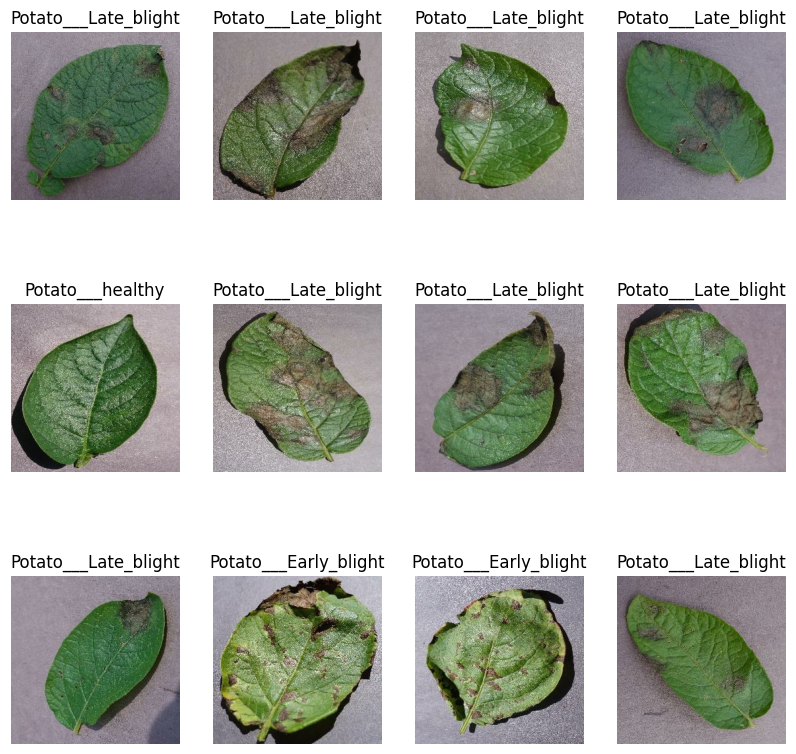

In [10]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        print(image_batch.shape)
        print(label_batch.numpy())
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

68

80%==>training
20%==>10% validation,10% test

In [12]:
len(dataset)

68

In [13]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [14]:
train_ds=dataset.take(54)
len(train_ds)

54

In [15]:
test_ds=dataset.skip(54)

In [16]:
len(test_ds)

14

In [17]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [21]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [27]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

/workspaces/keras-exercise/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7690 - loss: 0.5174 - val_accuracy: 0.8229 - val_loss: 0.4837
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8726 - loss: 0.3522 - val_accuracy: 0.8854 - val_loss: 0.2403
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9132 - loss: 0.2315 - val_accuracy: 0.8906 - val_loss: 0.2623
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9094 - loss: 0.2102 - val_accuracy: 0.8802 - val_loss: 0.2933
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9528 - loss: 0.1263 - val_accuracy: 0.7500 - val_loss: 0.8602
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8952 - loss: 0.2532 - val_accuracy: 0.8958 - val_loss: 0.2911
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9653 - loss: 0.0830 - val_accuracy: 0.9531 - val_loss: 0.1577
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9695 - loss: 0.0851 - val_accuracy: 0.9427 - val_loss:

In [37]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.9804 - loss: 0.0517


In [38]:
scores

[0.060368139296770096, 0.97265625]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [42]:
history.history['accuracy']

[0.7991898059844971,
 0.8964120149612427,
 0.8987268805503845,
 0.9201388955116272,
 0.9444444179534912,
 0.9276620149612427,
 0.9693287014961243,
 0.96875,
 0.9623842835426331,
 0.9641203880310059]

In [43]:
len(history.history['accuracy'])

10

In [44]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

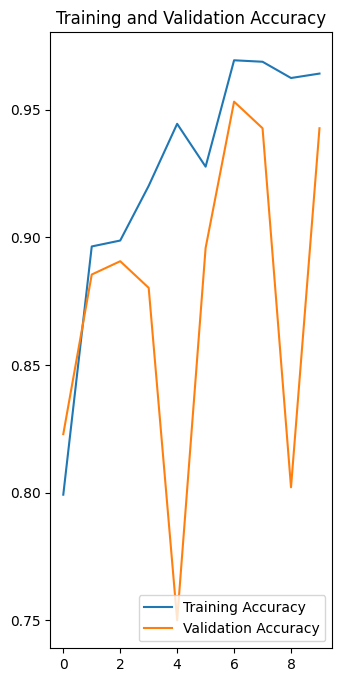

In [45]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

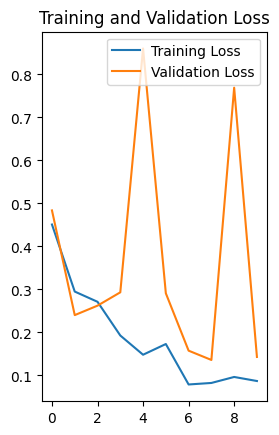

In [46]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
predicted label: Potato___Late_blight


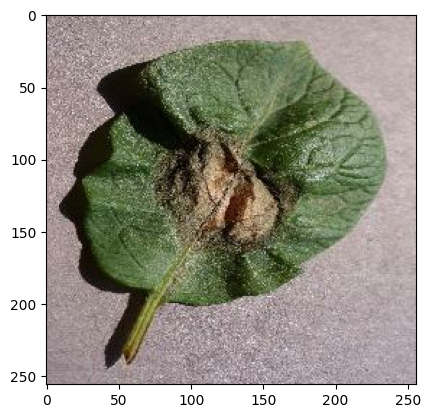

In [62]:



for images_batch, labels_batch in test_ds.take(1):
    # plt.imshow(images_batch[0].numpy().astype('uint8'))
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [63]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


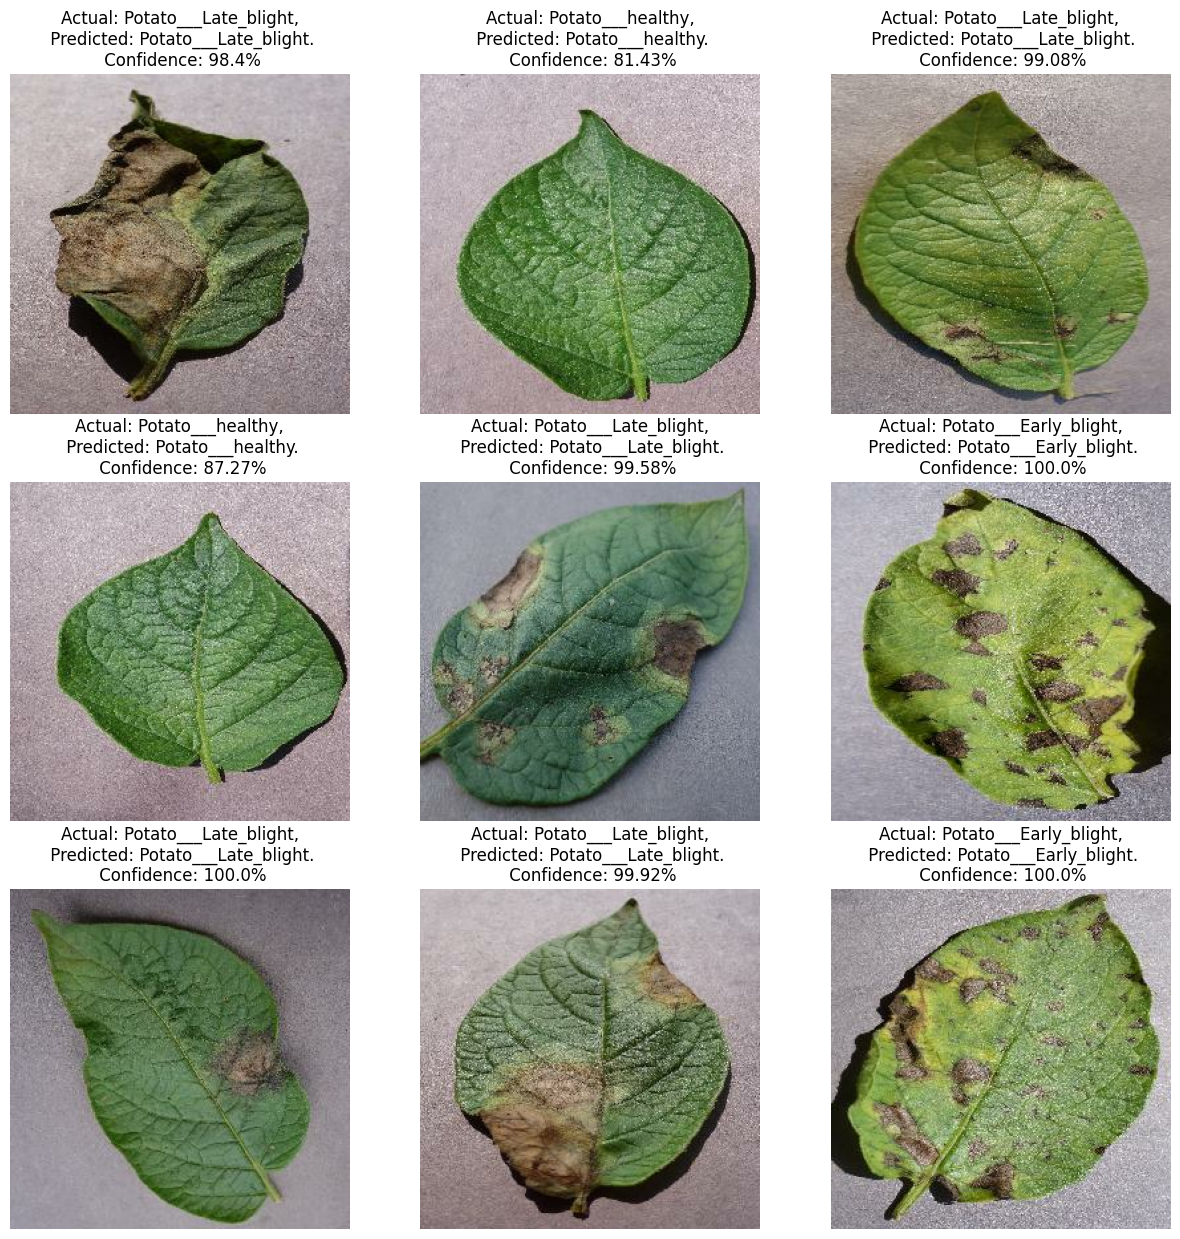

In [69]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
        predicted_class,confidence=predict(model,images[i])
        actual_class=class_names[labels[i].numpy()]

In [ ]:
# # model_version=1
# model.save(f"../models/{model_version}.keras")

In [ ]:
# model_version=2
# model.save(f"../models/{model_version}.keras")

In [78]:
import os
os.listdir("../models")

['1.keras', '2.keras']

In [79]:
model_version = max([int(i.split('.')[0]) for i in os.listdir("../models") if i.split('.')[0].isdigit()])+1
model_version

3

In [ ]:
model.save(f"../models/{model_version}.keras")

: 